In [1]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
gen = ImageDataGenerator(rescale=1./255,validation_split = 0.2,zoom_range=(0.99,0.99),dtype=tf.float32)

In [3]:
train = gen.flow_from_directory("../../BrainTumor/Data/DataSet/",
                               target_size = (150,150),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "training")
                
val = gen.flow_from_directory("../../BrainTumor/Data/DataSet/",
                               target_size = (150,150),
                               batch_size = 8,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "validation")
classes = val.class_indices

Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.


In [4]:
classes

{'BrainTumor': 0, 'Healthy': 1}

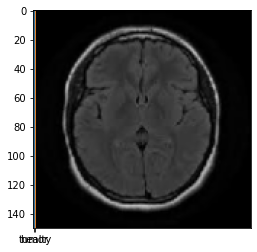

In [5]:
t=0
h=0
for i in range(15):
    a, b = next(train)
    for j in b:
        if j == 1:
            h+=1
        else:t+=1

sns.barplot(x=['tumor','healty'],y=[t,h])
import matplotlib.pyplot as plt
batch = next(train)

plt.imshow(batch[0][0])

In [6]:
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam

In [7]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(150,150,3)))
model.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())


model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer=Adam(0.0001),loss = BinaryCrossentropy(),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11214976  
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               5

In [8]:
from keras import utils, callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=5, restore_best_weights = True)

In [9]:
history = model.fit(train,verbose=1,callbacks = [earlystopping],epochs=20,validation_data=(val))

Epoch 1/20
15/15 [==============================] - 56s 4s/step - loss: 0.5951 - accuracy: 0.6982 - val_loss: 0.5924 - val_accuracy: 0.7606
Epoch 2/20
15/15 [==============================] - 72s 5s/step - loss: 0.4245 - accuracy: 0.7957 - val_loss: 0.6287 - val_accuracy: 0.5985
Epoch 3/20
15/15 [==============================] - 91s 6s/step - loss: 0.3120 - accuracy: 0.8677 - val_loss: 0.6260 - val_accuracy: 0.5593
Epoch 4/20
15/15 [==============================] - 86s 6s/step - loss: 0.2264 - accuracy: 0.9226 - val_loss: 0.6110 - val_accuracy: 0.5800
Epoch 5/20
15/15 [==============================] - 88s 6s/step - loss: 0.1723 - accuracy: 0.9503 - val_loss: 0.5688 - val_accuracy: 0.6888
Epoch 6/20
15/15 [==============================] - 108s 7s/step - loss: 0.1363 - accuracy: 0.9666 - val_loss: 0.5803 - val_accuracy: 0.6540
Epoch 7/20
15/15 [==============================] - 94s 6s/step - loss: 0.1068 - accuracy: 0.9791 - val_loss: 0.5295 - val_accuracy: 0.8303
Epoch 8/20
15/15 [=

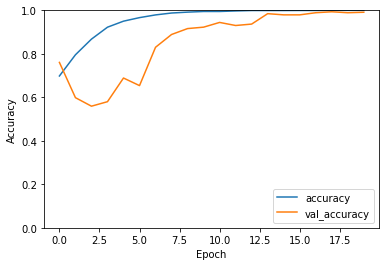

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


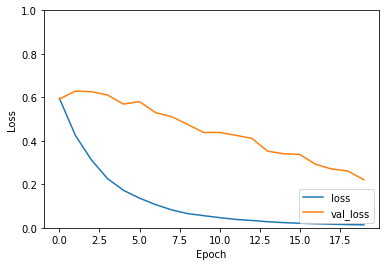

In [11]:

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [13]:
gen = ImageDataGenerator(rescale=1./255,zoom_range=(0.99,0.99),dtype=tf.float32)
test = gen.flow_from_directory("../../Test/DataSet/",
                               target_size = (150,150),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "training")

classes = val.class_indices

Found 245 images belonging to 2 classes.


In [14]:
_, acc  = model.evaluate(test, verbose=1)

1/1 [==============================] - 0s 0s/step - loss: 0.2306 - accuracy: 0.9959
